# Salary Prediction Using Linear Regression

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder

In [14]:
df = pd.read_csv('salary_prediction_updated_dataset.csv')
df.head()

,YearsExperience,Education Level,Job Role,Salary
0,14.98,PhD,Marketing Specialist,77861.24
1,38.03,PhD,Software Engineer,166880.38
2,29.28,Bachelor's,Business Analyst,123573.27
3,23.95,Master's,Marketing Specialist,90155.08
4,6.24,Master's,Business Analyst,55931.41


In [15]:
print(df.info())
print("\n\nDtype of Education Level:\n",df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearsExperience  100000 non-null  float64
 1   Education Level  100000 non-null  object 
 2   Job Role         100000 non-null  object 
 3   Salary           100000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB
None


Dtype of Education Level:
 YearsExperience    float64
Education Level     object
Job Role            object
Salary             float64
dtype: object


## Data Preprocessing

### Encoding Categorical columns (Dtype- object)

In [16]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
encoded_data = encoder.fit_transform(df[['Education Level','Job Role']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
df = pd.concat([df, encoded_df], axis =1).drop(['Education Level','Job Role'], axis=1)
df.head()

,YearsExperience,Salary,Education Level_Associate Degree,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Job Role_Business Analyst,Job Role_Data Scientist,Job Role_Marketing Specialist,Job Role_Product Manager,Job Role_Software Engineer
0,14.98,77861.24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.03,166880.38,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,29.28,123573.27,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23.95,90155.08,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6.24,55931.41,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Plotting for checking linearity

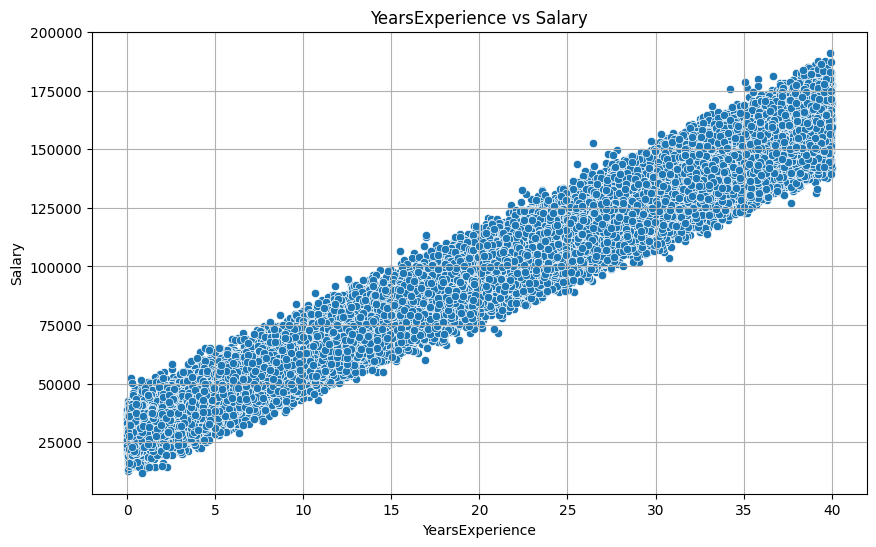

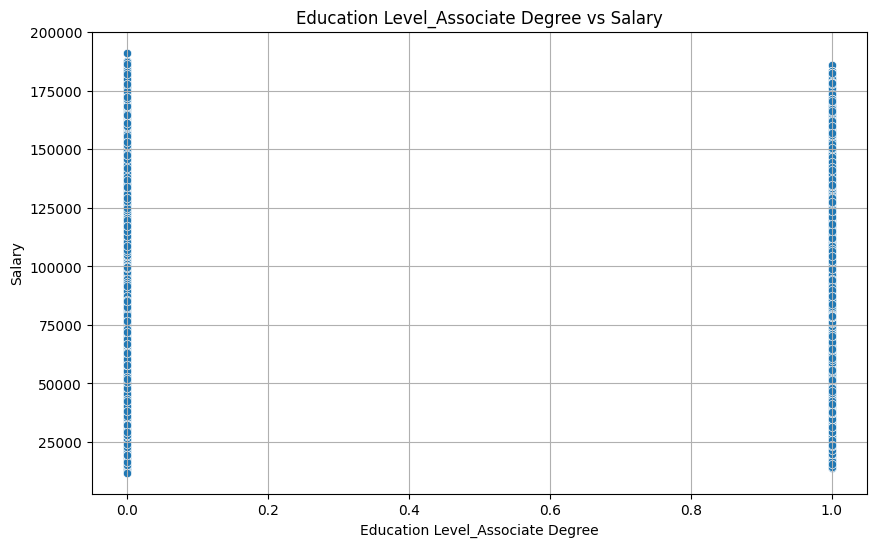

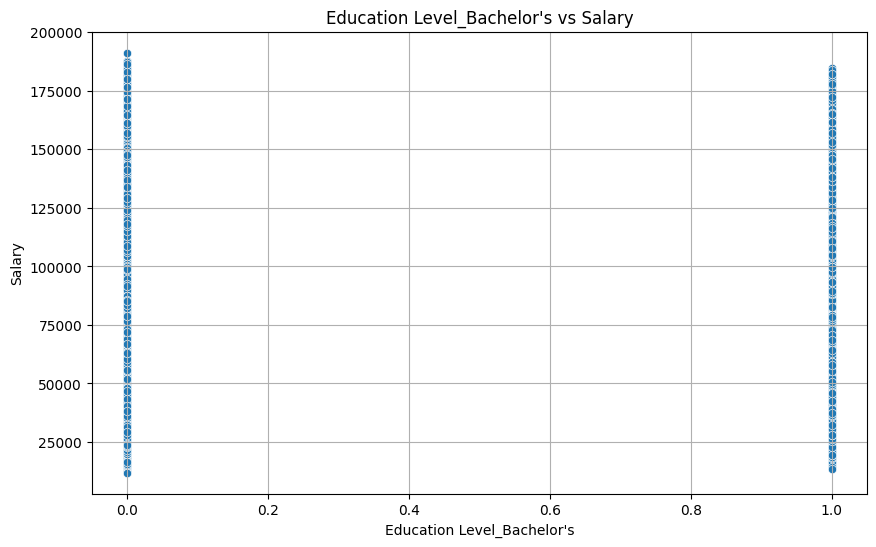

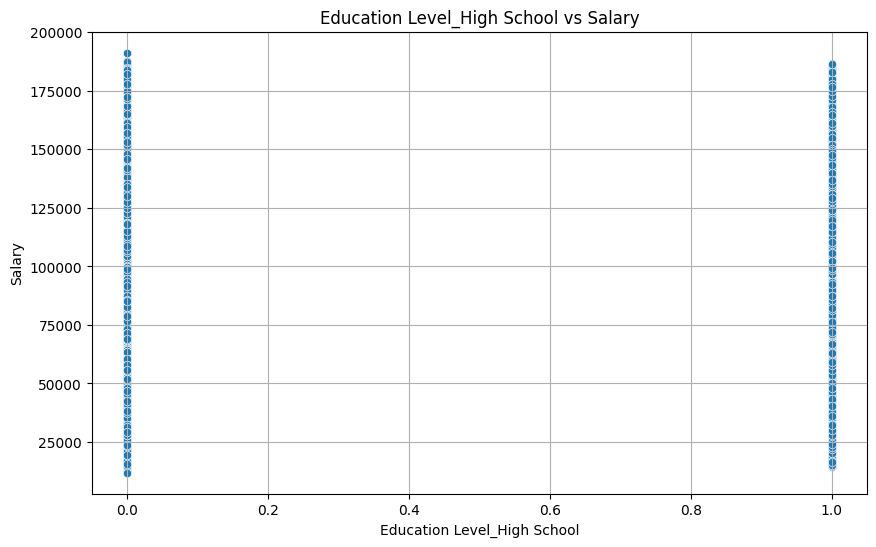

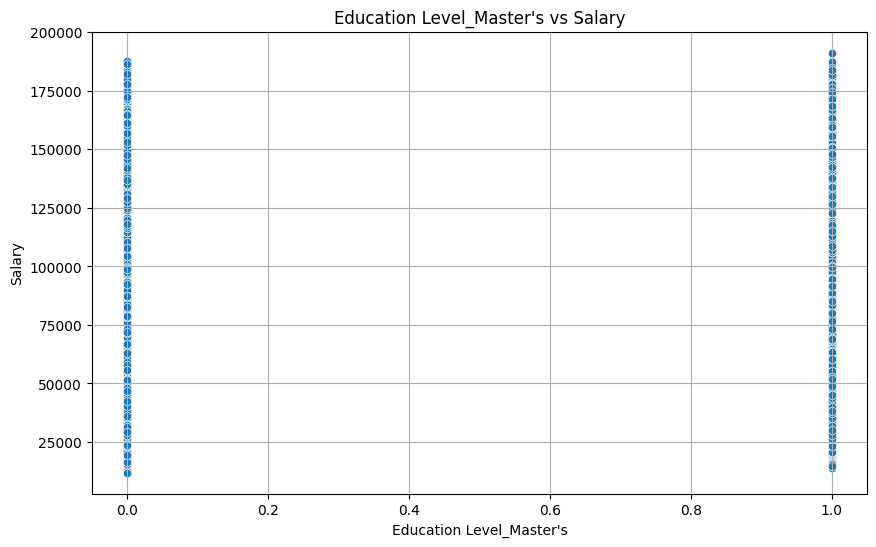

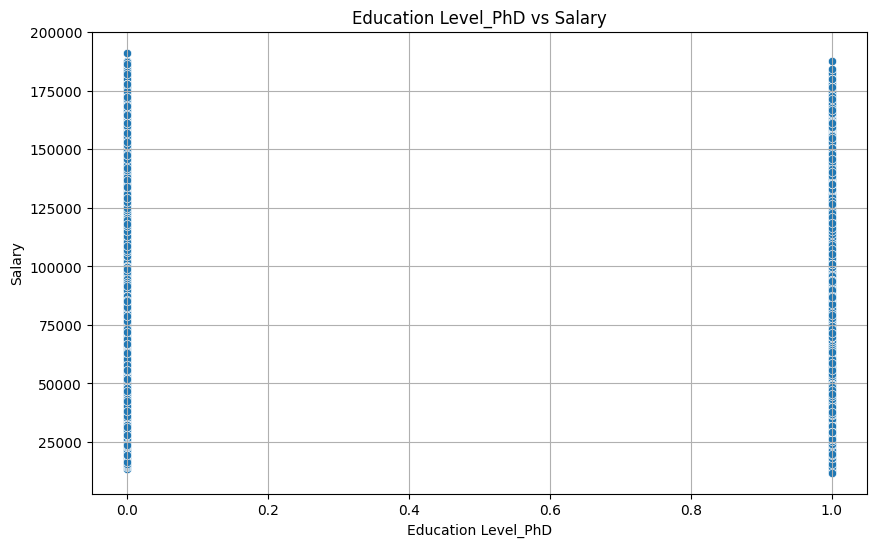

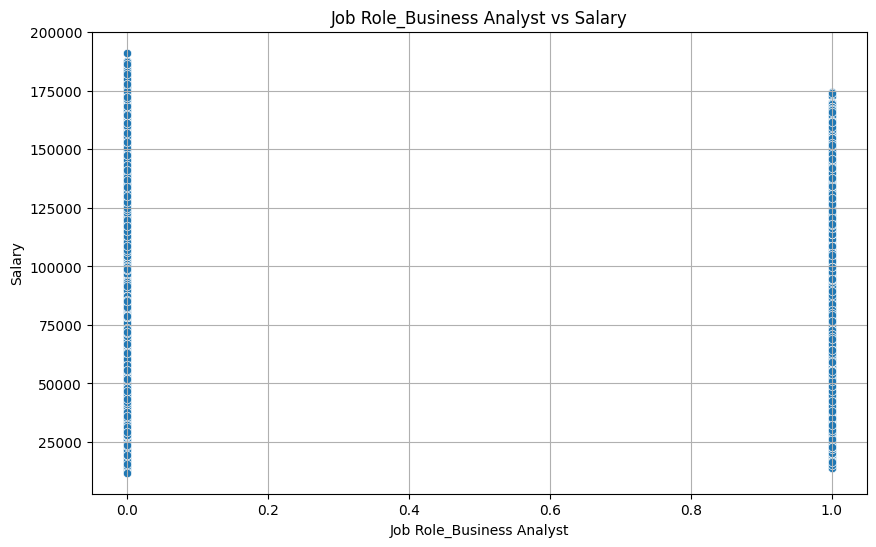

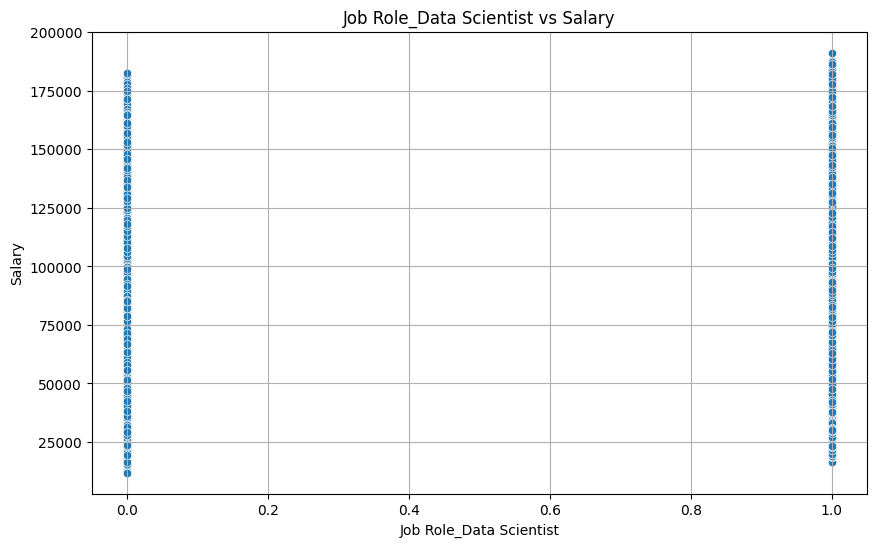

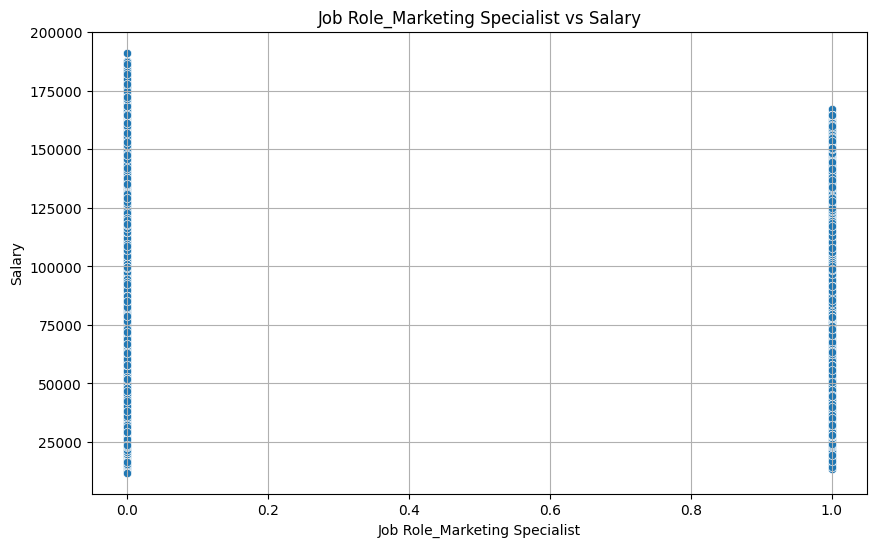

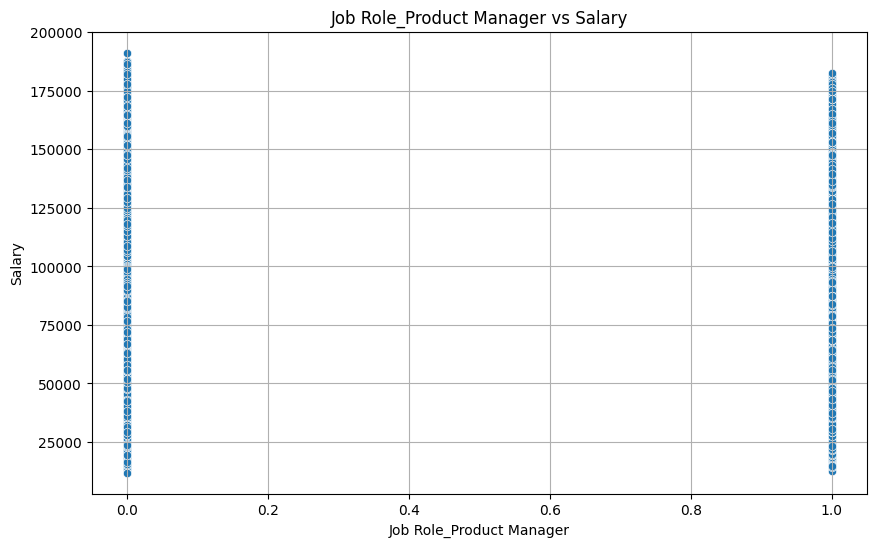

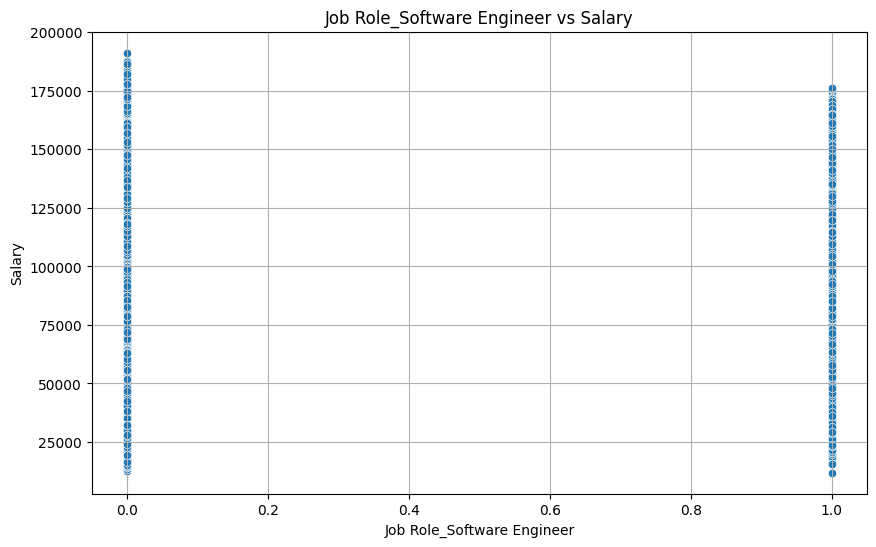

In [17]:
# scatterplot
for column in df.columns:
    if column != 'Salary':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x = df[column], y = df['Salary'])
        plt.title(f"{column} vs Salary")
        plt.xlabel(column)
        plt.ylabel('Salary')
        plt.grid(True)
        plt.show()

## Splitting data

In [18]:
x = df.drop(['Salary'], axis =1)
y = df['Salary']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modle Fitting
model = LinearRegression()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error is: ${mse:.2f}")
print(f"r2 score: {r2:.4}")

mean squared error is: $34818002.57
r2 score: 0.9777
